# Classification des types de diabètes

## Objectifs:

### Nous essayons de construire un modèle qui prédit le diabète chez les patients.


In [2]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.metrics import f1_score

from imblearn.over_sampling import SMOTE


import matplotlib.pyplot as plt

from sklearn import linear_model

from sklearn.linear_model import LogisticRegression
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,  recall_score, precision_score, RocCurveDisplay, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 , f_classif

from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.feature_selection import RFE
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('../data/data_train_diabetes_health_indicators.csv')
test_data = pd.read_csv('../data/date_validation_diabetes_health_indicators.csv')

# Analyse exploratoire des données (EDA)

In [4]:
data.head()

,Unnamed: 0,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,111866,2,1,1.0,1,32.0,1.0,0.0,1.0,1,...,1,0.0,2.0,15.0,0.0,0.0,1,7,6.0,6.0
1,206199,0,0,1.0,1,28.0,0.0,0.0,0.0,0,...,1,0.0,4.0,4.0,30.0,0.0,0,10,6.0,7.0
2,144211,0,0,1.0,1,24.0,1.0,0.0,0.0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,12,5.0,6.0
3,89872,2,1,1.0,1,38.0,0.0,0.0,0.0,1,...,1,0.0,3.0,0.0,0.0,0.0,1,7,6.0,8.0
4,34953,0,0,1.0,1,30.0,0.0,0.0,0.0,0,...,0,1.0,4.0,10.0,0.0,0.0,0,5,3.0,7.0


drop first column (useless)

In [5]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
data.shape

(47276, 22)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47276 entries, 0 to 47275
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_012          47276 non-null  int64  
 1   HighBP                47276 non-null  int64  
 2   HighChol              47276 non-null  float64
 3   CholCheck             47276 non-null  int64  
 4   BMI                   47276 non-null  float64
 5   Smoker                47276 non-null  float64
 6   Stroke                47276 non-null  float64
 7   HeartDiseaseorAttack  47276 non-null  float64
 8   PhysActivity          47276 non-null  int64  
 9   Fruits                47276 non-null  int64  
 10  Veggies               47276 non-null  int64  
 11  HvyAlcoholConsump     47276 non-null  int64  
 12  AnyHealthcare         47276 non-null  int64  
 13  NoDocbcCost           47276 non-null  float64
 14  GenHlth               47276 non-null  float64
 15  MentHlth           

In [8]:
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [9]:
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,...,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000
mean,0.305800,0.419325,0.401980,0.964337,28.939081,0.408114,0.038265,0.085752,0.781284,0.619807,...,0.962899,0.062696,2.473560,3.929245,3.761126,0.152720,0.476986,7.887829,5.142482,6.931191
std,0.703757,0.493454,0.490303,0.185450,6.562661,0.491490,0.191837,0.280000,0.413380,0.485439,...,0.189012,0.242417,1.027017,7.861948,8.239428,0.359721,0.499475,3.227736,0.945945,2.376979
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,4.000000,2.000000,0.000000,1.000000,10.000000,6.000000,9.000000
max,2.000000,1.000000,1.000000,1.000000,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000


Il n'y a pas de données manquantes

In [10]:
data.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Il y a 768 lignes dupliquées, elles doivent donc être supprimées.

In [11]:
data.duplicated().sum()

768

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data.shape

(46508, 22)

<Axes: >

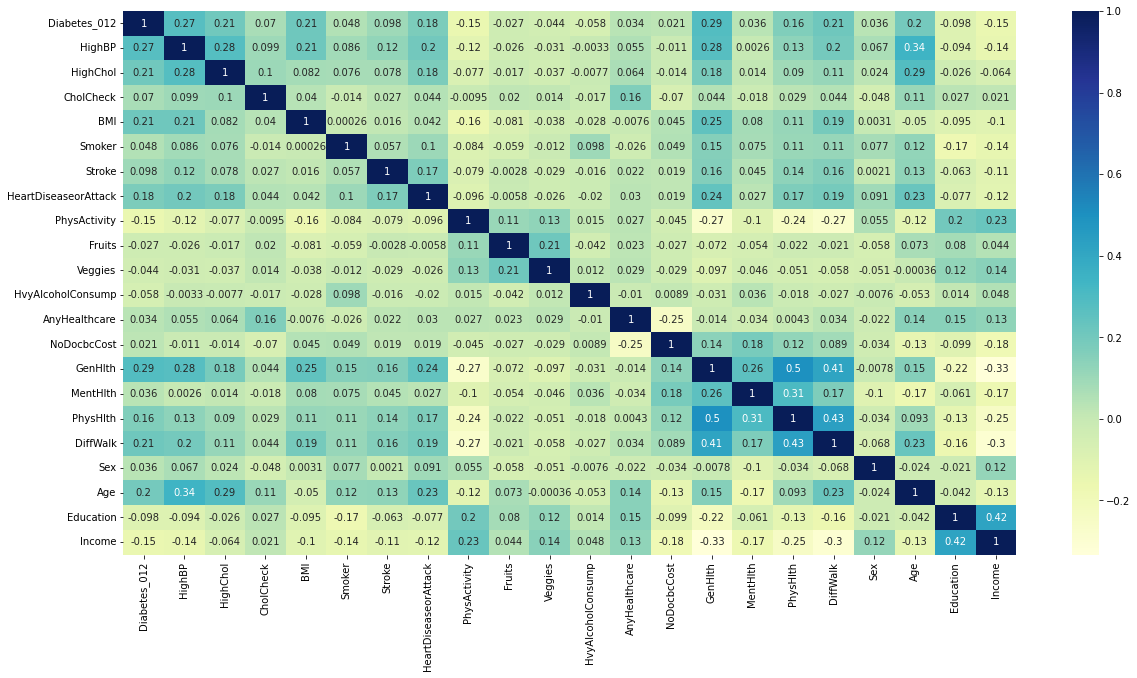

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

In [15]:
df_vis=data.copy()

## Visualisation


In [16]:
unique_values = {}
for col in df_vis.columns:
    unique_values[col] = df_vis[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Diabetes_012,3
HighBP,2
HighChol,2
CholCheck,2
BMI,74
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


## Ratio des diabètes dans l'ensemble de données avec leurs types


In [17]:
data['Diabetes_012'].value_counts()

0    38743
2     6687
1     1078
Name: Diabetes_012, dtype: int64

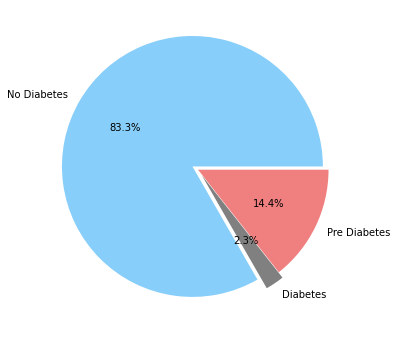

In [18]:
# pie plot of diabetes ratio
plt.figure(figsize=(8,6))
labels = ['No Diabetes', 'Diabetes', 'Pre Diabetes']
sizes = [data['Diabetes_012'].value_counts()[0], data['Diabetes_012'].value_counts()[1], data['Diabetes_012'].value_counts()[2]]
colors = ['lightskyblue', 'grey', 'lightcoral']
explode = (0.05, 0.05, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, autopct='%.1f%%', colors=colors, data = data);



#### "Pas de diabète" est le cas le plus courant dans l'ensemble des données, suivi par "diabète" et "pré-diabète".



## corrélation avec le diabète_012 à l'aide d'un graphique à barres

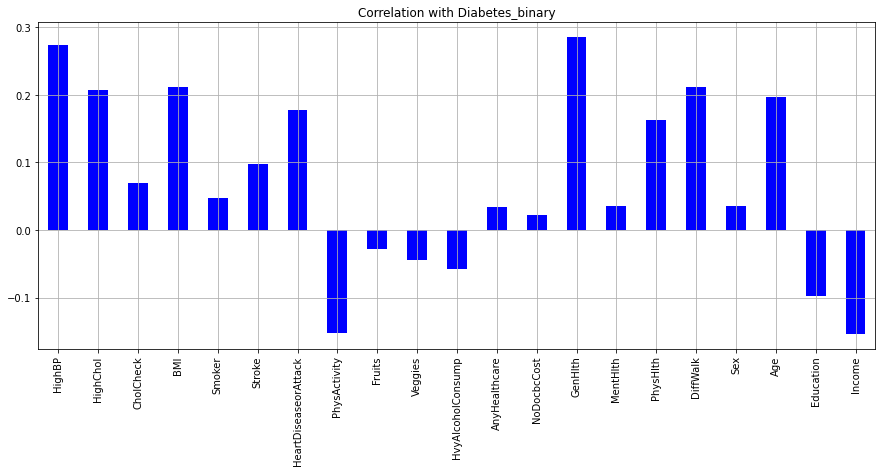

In [19]:
data.drop('Diabetes_012', axis=1).corrwith(data.Diabetes_012).plot(kind='bar', grid=True, figsize=(15, 6)
, title="Correlation with Diabetes_binary",color="blue");

1. Fruits , AnyHealthcare , NoDocbccost and sex sont les moins corrélés avec Diabetes_binary.

2. HighBP , HighChol , BMI , smoker , stroke , HeartDiseaseorAttack , PhysActivity , Veggies , HvyAlcoholconsump , GenHlth , PhysHlth , Age , Education , Income and DiffWalk ont une corrélation significative avec le diabète_012.

# Preprocessing

[Text(0, 0, 'Diabetes_012'),
 Text(1, 0, 'HighBP'),
 Text(2, 0, 'HighChol'),
 Text(3, 0, 'CholCheck'),
 Text(4, 0, 'BMI'),
 Text(5, 0, 'Smoker'),
 Text(6, 0, 'Stroke'),
 Text(7, 0, 'HeartDiseaseorAttack'),
 Text(8, 0, 'PhysActivity'),
 Text(9, 0, 'Fruits'),
 Text(10, 0, 'Veggies'),
 Text(11, 0, 'HvyAlcoholConsump'),
 Text(12, 0, 'AnyHealthcare'),
 Text(13, 0, 'NoDocbcCost'),
 Text(14, 0, 'GenHlth'),
 Text(15, 0, 'MentHlth'),
 Text(16, 0, 'PhysHlth'),
 Text(17, 0, 'DiffWalk'),
 Text(18, 0, 'Sex'),
 Text(19, 0, 'Age'),
 Text(20, 0, 'Education'),
 Text(21, 0, 'Income')]

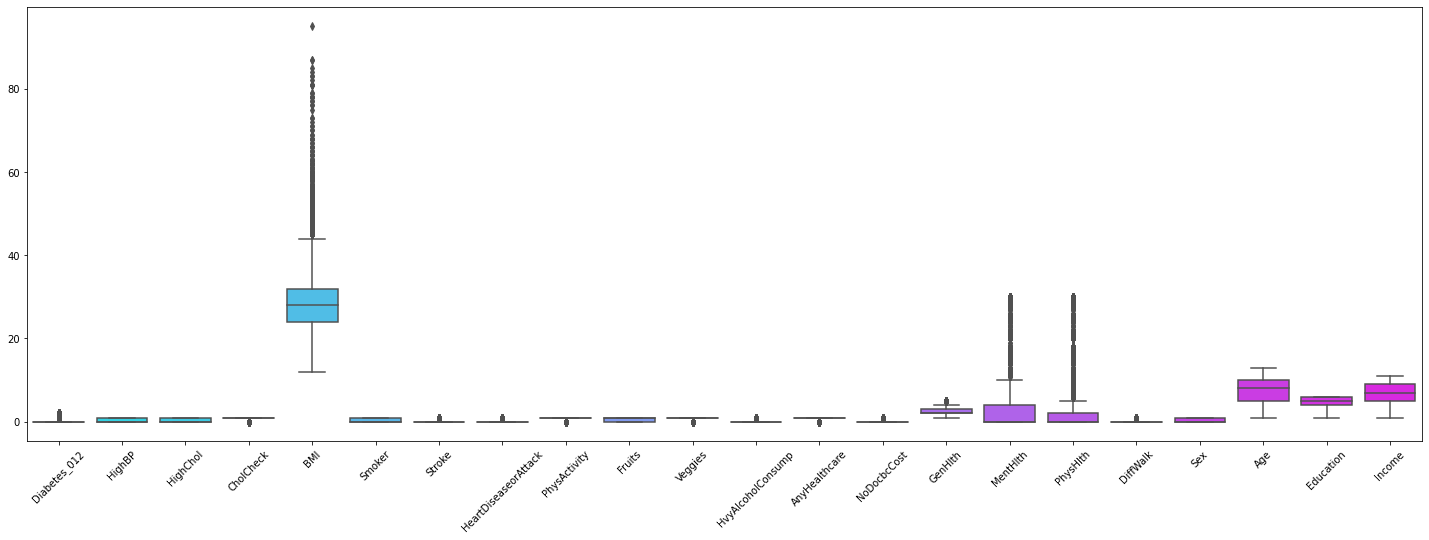

In [20]:
plt.figure(figsize = (25,8))
u = sns.boxplot(palette = 'cool', data=data)
u.set_xticklabels(u.get_xticklabels(),rotation=45)

il y a des valeurs aberrantes dans l'BMI

In [21]:
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

### traiter les valeurs aberrantes de l'BMI

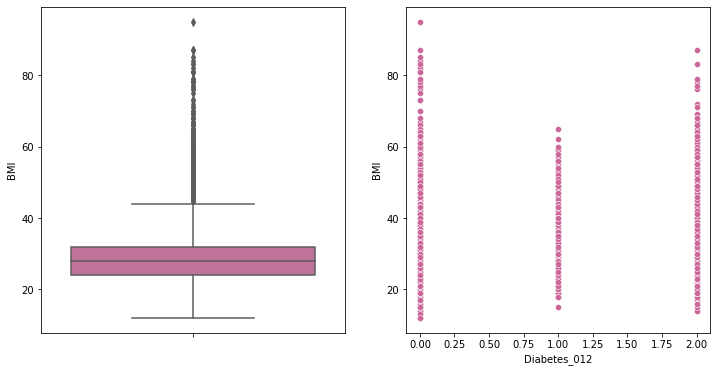

In [22]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=data,y='BMI',color='#cc6699')
plt.subplot(1, 2, 2)
sns.scatterplot(data=data,x='Diabetes_012',y='BMI',color='#cc6699')
plt.show()

In [23]:
x=data[data['BMI']>=70]
x.shape

(31, 22)

In [24]:
df=data.copy()

On supprime les valeurs abberantes (>70)

In [25]:
df=data[data['BMI']<70]

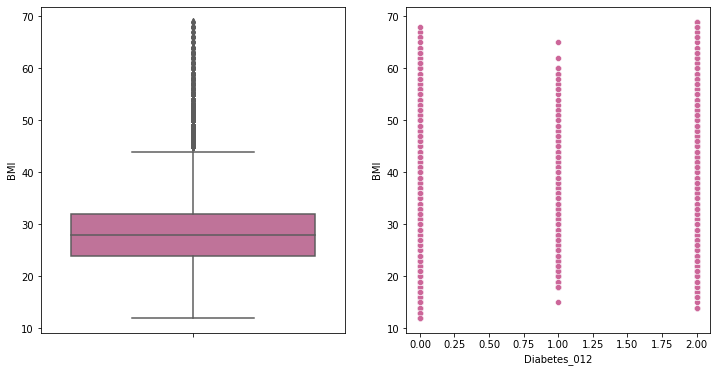

In [26]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df,y='BMI',color='#cc6699')
plt.subplot(1, 2, 2)
sns.scatterplot(data=df,x='Diabetes_012',y='BMI',color='#cc6699')
plt.show()

In [27]:
df['Diabetes_012'].value_counts()

0    38721
2     6678
1     1078
Name: Diabetes_012, dtype: int64

In [28]:
test_data.head()

,Unnamed: 0,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,111866,2,1,1.0,1,32.0,1.0,0.0,1.0,1,...,1,0.0,2.0,15.0,0.0,0.0,1,7,6.0,6.0
1,206199,0,0,1.0,1,28.0,0.0,0.0,0.0,0,...,1,0.0,4.0,4.0,30.0,0.0,0,10,6.0,7.0
2,144211,0,0,1.0,1,24.0,1.0,0.0,0.0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,12,5.0,6.0
3,89872,2,1,1.0,1,38.0,0.0,0.0,0.0,1,...,1,0.0,3.0,0.0,0.0,0.0,1,7,6.0,8.0
4,34953,0,0,1.0,1,30.0,0.0,0.0,0.0,0,...,0,1.0,4.0,10.0,0.0,0.0,0,5,3.0,7.0


In [29]:
test_data.drop('Unnamed: 0', axis = 1, inplace = True)

In [35]:
y_train = df['Diabetes_012']
x_train = df.drop(['Diabetes_012'], axis=1)
y_test = test_data['Diabetes_012']
x_test = test_data.drop(['Diabetes_012'], axis = 1)

# First Try
### Try to make all classes like diabetes

In [36]:
df[df['Diabetes_012']==2].shape

(6678, 22)

In [37]:
df[df['Diabetes_012']==2].shape[0]/df[df['Diabetes_012']==0].shape[0]

0.1724645541179205

In [38]:
df_new=df[df['Diabetes_012']==0]
df_new = df_new.sample(frac=0.1724645541179205)
df_new['Diabetes_012'].value_counts()

0    6678
Name: Diabetes_012, dtype: int64

In [39]:
df_new2=df[df['Diabetes_012']==2]
df_new2['Diabetes_012'].value_counts()

2    6678
Name: Diabetes_012, dtype: int64

In [40]:
df_new.shape[0]/df[df['Diabetes_012']==1].shape[0]

6.194805194805195

In [41]:
df_new3=df[df['Diabetes_012']==1]
df_new3 = df_new3.sample(frac=6.194805194805195, replace=True)
df_new3['Diabetes_012'].value_counts()

1    6678
Name: Diabetes_012, dtype: int64

In [42]:
df_all=pd.concat([df_new,df_new2,df_new3])

In [43]:
df_all.shape

(20034, 22)

In [44]:
y = df_all['Diabetes_012']
x = df_all.drop(['Diabetes_012'], axis=1)

In [46]:

svm_1 = svm.SVC()
svm_1.fit(x,y)



y_pred_test_svm1 = svm_1.predict(x_test)
f1_test_svm1 = f1_score(y_test, y_pred_test_svm1, average='micro')

y_pred_train_svm1 = svm_1.predict(x)
f1_train_svm1 = f1_score(y, y_pred_train_svm1, average='micro')
print(f'train f1 = ', f1_train_svm1)
print(f'test f1 = ', f1_test_svm1)


train f1 =  0.5206149545772187
test f1 =  0.609527032743887


In [47]:
print(classification_report(y_test, y_pred_test_svm1))

              precision    recall  f1-score   support

           0       0.95      0.61      0.75      9855
           1       0.03      0.29      0.06       263
           2       0.34      0.64      0.45      1701

    accuracy                           0.61     11819
   macro avg       0.44      0.51      0.42     11819
weighted avg       0.84      0.61      0.69     11819



# Second Try
## Try to make all classes like prediabetes

In [68]:
df[df['Diabetes_012']==1].shape

(1078, 22)

In [69]:
df[df['Diabetes_012']==1].shape[0]/df[df['Diabetes_012']==0].shape[0]

0.027840190077735597

In [70]:
df_new=df[df['Diabetes_012']==0]
df_new = df_new.sample(frac=0.027840190077735597)
df_new['Diabetes_012'].value_counts()

0    1078
Name: Diabetes_012, dtype: int64

In [71]:
df_new2=df[df['Diabetes_012']==1]
df_new2['Diabetes_012'].value_counts()

1    1078
Name: Diabetes_012, dtype: int64

In [72]:
df_new.shape[0]/df[df['Diabetes_012']==2].shape[0]

0.16142557651991615

In [73]:
df_new3=df[df['Diabetes_012']==2]
df_new3 = df_new3.sample(frac=0.16142557651991615
)
df_new3['Diabetes_012'].value_counts()

2    1078
Name: Diabetes_012, dtype: int64

In [74]:
df_all=pd.concat([df_new,df_new2,df_new3])

In [75]:
df_all.shape

(3234, 22)

In [77]:
y = df_all['Diabetes_012']
x = df_all.drop(['Diabetes_012'], axis=1)

In [78]:
svm_2 = svm.SVC()
svm_2.fit(x,y)

y_pred_train_svm2 = svm_2.predict(x)
f1_train_svm2 = f1_score(y, y_pred_train_svm2)


y_pred_test_svm2 = svm_2.predict(x_test)
f1_test_svm2 = f1_score(y_test, y_pred_test_svm2)

print(f'train f1 = ', f1_train_svm2)
print(f'test f1 = ', f1_test_svm2)


train acc =  0.48794063079777367
test acc =  0.5941280988239276


In [79]:
print(classification_report(y_test, y_pred_test_svm2))

              precision    recall  f1-score   support

           0       0.95      0.60      0.73      9855
           1       0.03      0.22      0.05       263
           2       0.31      0.64      0.42      1701

    accuracy                           0.59     11819
   macro avg       0.43      0.49      0.40     11819
weighted avg       0.84      0.59      0.67     11819



# Third Try (SMOTE)

In [31]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x_train, y_train)

In [98]:
svm_3 = svm.SVC()
svm_3.fit(X_res,y_res)

y_pred_train_svm3 = svm_3.predict(X_res)
f1_train_svm3 = f1_score(y_res, y_pred_train_svm3)


y_pred_test_svm3 = svm_3.predict(x_test)
f1_test_svm3 = f1_score(y_test, y_pred_test_svm3)

print(f'train f1 = ', f1_train_svm3)
print(f'test f1 = ', f1_test_svm3)


In [85]:
print(classification_report(y_test, y_pred_test_svm3))

              precision    recall  f1-score   support

           0       0.95      0.60      0.73      9855
           1       0.03      0.22      0.05       263
           2       0.31      0.64      0.42      1701

    accuracy                           0.59     11819
   macro avg       0.43      0.49      0.40     11819
weighted avg       0.84      0.59      0.67     11819



## Hyper-parameter tuning

In [87]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3,scoring='f1_micro') 
  
# fitting the model for grid search 
grid.fit(X_res, y_res) 



Fitting 5 folds for each of 20 candidates, totalling 100 fits


[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.332 total time=   4.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.332 total time=   3.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.332 total time=   3.5s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.332 total time=   3.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.336 total time=   3.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.400 total time=   2.9s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.393 total time=   2.8s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.413 total time=   2.8s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.411 total time=   3.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.415 total time=   3.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.440 total time=   2.7s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.465 total time=   2.7s
[CV 3/5] END .....C=0.1, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='f1_micro', verbose=3)

In [88]:
# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 


{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=100, gamma=0.0001)


In [89]:
grid_predictions = grid.predict(x_test) 
  
# print classification report 
print(classification_report(y_test, grid_predictions)) 


              precision    recall  f1-score   support

           0       0.95      0.64      0.76      9855
           1       0.03      0.22      0.05       263
           2       0.35      0.64      0.45      1701

    accuracy                           0.63     11819
   macro avg       0.44      0.50      0.42     11819
weighted avg       0.84      0.63      0.70     11819



In [49]:
import pickle

# best_model = grid.best_estimator_
with open("svm.pkl","wb") as f:
    pickle.dump(svm_1,f)

---